## Pizza Sales Analysis
**Recommended Analysis**

1) What is the total revenue/sales?
2) Find the total quantity sold.
3) Find the total orders.
4) How many pizza types do they sell?
5) Find the average price of the pizzas.
6) What are the peak hours of sales?
7) Find the total sales made on each day of the week. Which day of the week is when sales are made the most?
8) Find the top 5 bestselling pizzas.
9) Find the sales made in each month. Any trend noticeable?
10) Are there pizza types that are not doing well on the menu?

## Import the Dataset

In [115]:
# load the four CSV files
order_details = pd.read_csv("C:/Users/DELL/Desktop/WeddevPrac/Pizza+Place+Sales/pizza_sales/order_details.csv")
orders = pd.read_csv("C:/Users/DELL/Desktop/WeddevPrac/Pizza+Place+Sales/pizza_sales/orders.csv")
pizza_types = pd.read_csv("C:/Users/DELL/Desktop/WeddevPrac/Pizza+Place+Sales/pizza_sales/pizza_types.csv")
pizzas = pd.read_csv("C:/Users/DELL/Desktop/WeddevPrac/Pizza+Place+Sales/pizza_sales/pizzas.csv")

## import libraries and combine the dataset 

In [140]:
# load the needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## merge the 4 dataset as one

In [118]:
df_merge = pizza_types.merge(pizzas, on= 'pizza_type_id').merge(order_details, on = 'pizza_id').merge(orders, on = 'order_id')
df_merge.head()

,pizza_type_id,name,category,ingredients,pizza_id,size,price,order_details_id,order_id,quantity,date,time
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,11,6,1,1/1/2015,12:29:36
1,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,239,102,1,1/2/2015,17:54:04
2,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,294,124,1,1/2/2015,20:12:34
3,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,458,194,1,1/3/2015,21:21:24
4,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,489,208,1,1/4/2015,12:12:05


In [119]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pizza_type_id     48620 non-null  object 
 1   name              48620 non-null  object 
 2   category          48620 non-null  object 
 3   ingredients       48620 non-null  object 
 4   pizza_id          48620 non-null  object 
 5   size              48620 non-null  object 
 6   price             48620 non-null  float64
 7   order_details_id  48620 non-null  int64  
 8   order_id          48620 non-null  int64  
 9   quantity          48620 non-null  int64  
 10  date              48620 non-null  object 
 11  time              48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


## 1) What is the total revenue/sales?

In [122]:
df_merge['Revenue'] = df_merge['quantity'] * df_merge['price']
revenue = df_merge['Revenue'].sum()

# print the reveune value 
print(f"Total Revenue is {revenue}")

Total Revenue is 817860.05


## 2) Find the total quantity sold.

In [123]:
# Total  quantity sold is the sum of the quantity column
total_qnt = df_merge["quantity"].sum()

# print the total quantity
print(f"Total Quantity is {total_qnt}")

Total Quantity is 49574


## 3) Find the total orders.

In [124]:
# Total order is obtained form the sum of the order_id column
total_order = df_merge["order_id"].count()

# print the number of orders made
print(f"{total_order} ordes where made")

48620 ordes where made


## 4) How many pizza types do they sell?

In [125]:
# Pizza types is the category of pizza sold
df_merge['category'].unique()

array(['Chicken', 'Classic', 'Supreme', 'Veggie'], dtype=object)

In [127]:
# number of the types of pizza sold 
pizza_type = len(df_merge['category'].unique())
# print out the value 
print(f"They sell {pizza_type} types of pizza")

They sell 4 types of pizza


In [145]:
# counts of each pizza types
category_count = df_merge['category'].value_counts().reset_index()
category_count

,category,count
0,Classic,14579
1,Supreme,11777
2,Veggie,11449
3,Chicken,10815


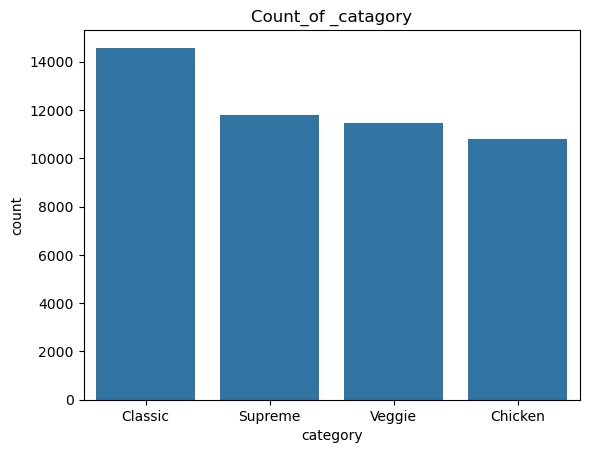

In [147]:
# show this in a plot
sns.barplot(x="category", y = 'count', data=category_count)
plt.title("Count_of _catagory")
plt.show()

## 5) Find the average price of the pizzas

In [129]:
df_merge['price'].mean().round(2)

16.49

## 6) What are the peak hours of sales?

In [131]:
# cponvert to datetime column
df_merge['date'] = pd.to_datetime(df_merge['date'])
df_merge['time'] = pd.to_datetime(df_merge['time'])

# get the hours in of the data form the data.
df_merge['hours'] = df_merge['time'].dt.hour
df_merge['hours']. reset_index()

# get sales by hours 
peak_sales_hour = df_merge['hours'].value_counts().sort_values(ascending=False).reset_index()
peak_sales_hour = peak_sales_hour.iloc[0,0]

# print the time highes sales occur
print(f'The Peak hour of Sales occurs at {peak_sales_hour}noon')

The Peak hour of Sales occurs at 12noon


## 7) Find the total sales made on each day of the week. Which day of the week is when sales are made the most?

In [152]:
# convert data column in orders to datetime column
df_merge['day'] =df_merge['date'].dt.day_name()

#get sales by day
daily_sales = df_merge['day'].value_counts().reset_index()
daily_sales

,day,count
0,Friday,8106
1,Saturday,7355
2,Thursday,7323
3,Wednesday,6797
4,Tuesday,6753
5,Monday,6369
6,Sunday,5917


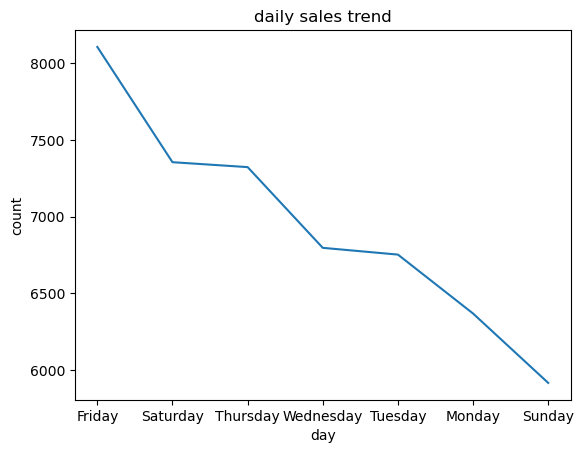

In [153]:
# show daily sales trend plot
sns.lineplot(x='day', y = 'count', data = daily_sales)
plt.title("daily sales trend")
plt.show()

In [134]:
# get the highest row which is the first using subseting
Peak_day_sales = daily_sales.iloc[0,0]
Peak_day_sales

# print the result
print(f'The day of the week with highest sales is sales {Peak_day_sales}')

The day of the week with highest sales is sales Friday


## 8) Find the top 5 bestselling pizzas

In [190]:
# counts of pizzas by name by name
top_5_pizzas = df_merge['name'].value_counts().reset_index().iloc[0:5]
top_5_pizzas

,name,count
0,The Classic Deluxe Pizza,2416
1,The Barbecue Chicken Pizza,2372
2,The Hawaiian Pizza,2370
3,The Pepperoni Pizza,2369
4,The Thai Chicken Pizza,2315


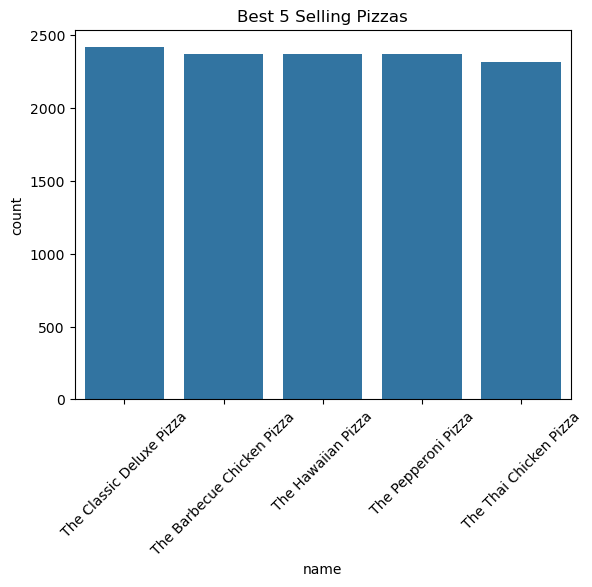

In [162]:
# show plot for top 5 best sellings pizzas
sns.barplot(x = "name", y = "count", data = top_5_pizzas)
plt.title('Best 5 Selling Pizzas')
plt.xticks(rotation=45) 
plt.show()

## 9) Find the sales made in each month. Any trend noticeable?

In [165]:
df_merge['date'] = pd.to_datetime(df_merge['date'])
df_merge['month'] = df_merge['date'].dt.month
monthly_sales = df_merge['month'].value_counts().sort_index().reset_index()
monthly_sales

,month,count
0,1,4156
1,2,3892
2,3,4186
3,4,4067
4,5,4239
5,6,4025
6,7,4301
7,8,4094
8,9,3819
9,10,3797


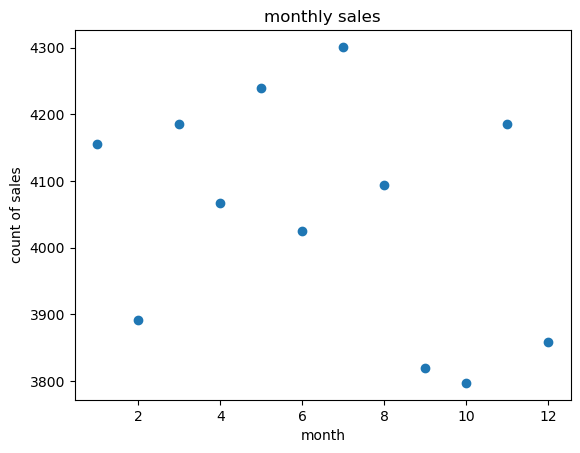

In [168]:
plt.scatter(x='month', y = 'count', data = monthly_sales)
plt.title("monthly sales")
plt.xlabel('month')
plt.ylabel('count of sales')
plt.show()

**There is no noticeable trend in sales monthly, but we couls see that thre is decrease of sales during the end of the year apart from a sharp increase in the 11th month**

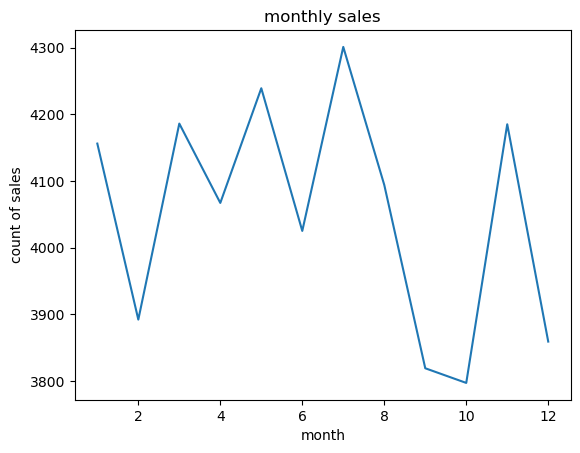

In [172]:
sns.lineplot(x='month', y = 'count', data = monthly_sales)
plt.title("monthly sales")
plt.xlabel('month')
plt.ylabel('count of sales')
plt.show()

## 10) Are there pizza types that are not doing well on the menu?

In [174]:
df_merge.head()

,pizza_type_id,name,category,ingredients,pizza_id,size,price,order_details_id,order_id,quantity,date,time,Revenue,hours,day,month
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,11,6,1,2015-01-01,2025-05-11 12:29:36,12.75,12,Thursday,1
1,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,239,102,1,2015-01-02,2025-05-11 17:54:04,12.75,17,Friday,1
2,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,294,124,1,2015-01-02,2025-05-11 20:12:34,12.75,20,Friday,1
3,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,458,194,1,2015-01-03,2025-05-11 21:21:24,12.75,21,Saturday,1
4,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,489,208,1,2015-01-04,2025-05-11 12:12:05,12.75,12,Sunday,1


In [183]:
pizza_sales =df_merge.groupby('category')['Revenue'].sum().sort_index().reset_index()
pizza_sales

,category,Revenue
0,Chicken,195919.50
1,Classic,220053.10
2,Supreme,208197.00
3,Veggie,193690.45


In [188]:
pizza_sold=df_merge.groupby('category')['quantity'].sum().sort_index().reset_index()
pizza_sold

,category,quantity
0,Chicken,11050
1,Classic,14888
2,Supreme,11987
3,Veggie,11649


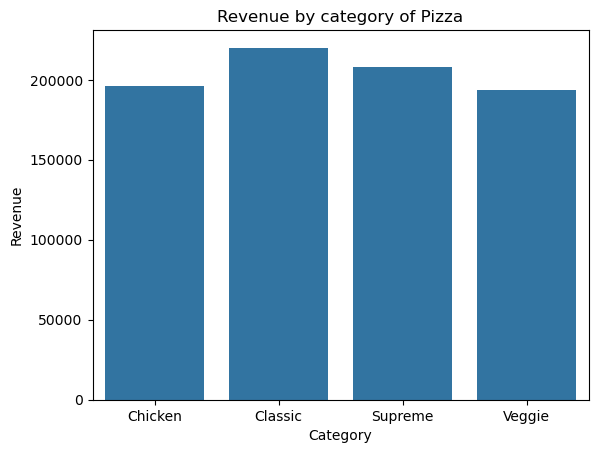

In [184]:
# show in plot
sns.barplot(x = 'category', y= 'Revenue', data = pizza_sales)
plt.title( 'Revenue by category of Pizza')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

**Veggie types of pizzas is not doing well in terms of revenue and quantity sold**